<a href="https://colab.research.google.com/github/Bharat745/H2O/blob/master/DL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera_W4

## Imports/Installations

In [0]:
# Installing java version for running H2O on colab
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
openjdk version "11.0.3" 2019-04-16
OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1)
OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)


In [0]:
# Start and connect to local H2O cluster
! pip install h2o
import h2o
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.3" 2019-04-16; OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1); OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnmg6kqyf
  JVM stdout: /tmp/tmpnmg6kqyf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnmg6kqyf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_unknownUser_b8rvbz
H2O cluster total nodes:,1
H2O cluster free memory:,2.938 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Number of cores - 2 , 
Memory - 2.907 GB

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Importing the data file 
data = h2o.import_file(path ="http://coursera.h2o.ai/cacao.882.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
data.shape

(1795, 9)

In [0]:
data.types

{'Bean Origin': 'enum',
 'Bean Type': 'enum',
 'Cocoa Percent': 'real',
 'Maker': 'enum',
 'Maker Location': 'enum',
 'Origin': 'enum',
 'REF': 'int',
 'Rating': 'real',
 'Review Date': 'int'}

In [0]:
# Splitting the data to train, validation & test
train, valid, test = data.split_frame([0.8, 0.1] , seed = 69)

In [0]:
print("%d/%d/%d" % (train.nrows, valid.nrows, test.nrows))

1431/188/176


In [0]:
# Defining the features and target
x = list(train.columns)
y = "Maker Location"

In [0]:
x

['Maker',
 'Origin',
 'REF',
 'Review Date',
 'Cocoa Percent',
 'Maker Location',
 'Rating',
 'Bean Type',
 'Bean Origin']

## Modelling/Analysis

### Baseline Model

In [0]:
# Deep Learning Model
from h2o.estimators.deeplearning import H2ODeepLearningEstimator


# Making a baseline model
m1_DLC = H2ODeepLearningEstimator()
%time m1_DLC.train(x, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 311 ms, sys: 35.5 ms, total: 346 ms
Wall time: 21.5 s


In [0]:
m1_DLC.model_performance(valid)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.21605027398258841
RMSE: 0.46481208459181483
LogLoss: 0.8287496423341222
Mean Per-Class Error: 0.26043363239015416
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 2
0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,2 / 5
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,86.0,0.0,0.0,0.0,0.0444444,4 / 90
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.7925532
2,0.8617021
3,0.8989362
4,0.9202128
5,0.9414894
6,0.9468086
7,0.9468086
8,0.9574469
9,0.9680852
10,0.9734044


We see from the above model that the error rate is 20% for our baseline model. giving a hit ratio of 79%. We see a high error rate as the number of classification output is 60 which is very high, also there is no additional hidden layers to the model.

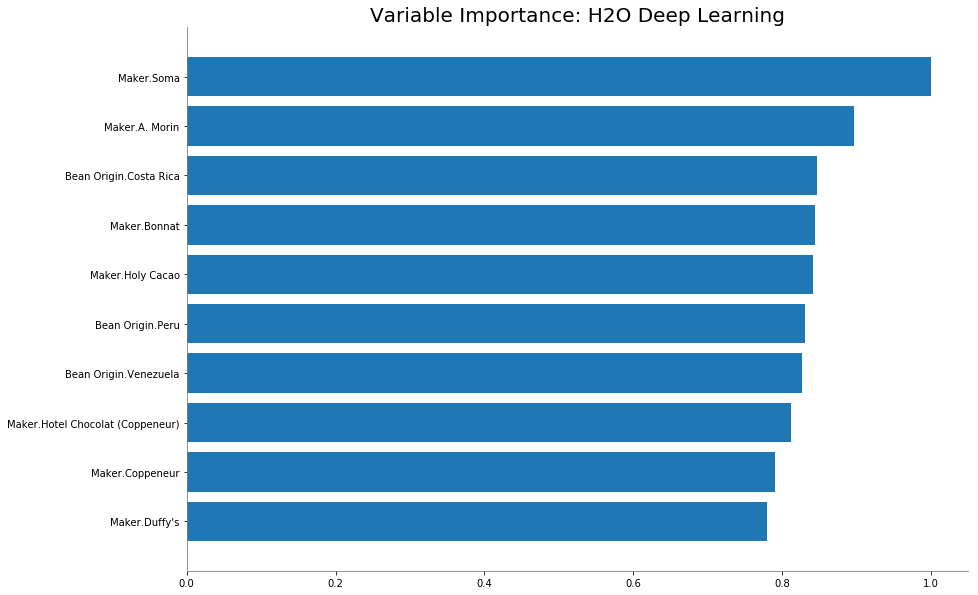

In [0]:
m1_DLC.varimp_plot()

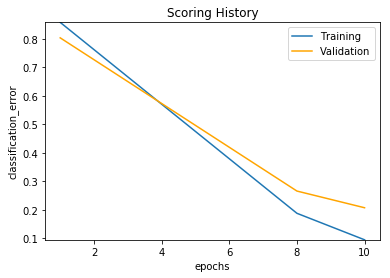

In [0]:
m1_DLC.plot()

We see from above that at around 6 epochs, the validation frame and training frame started to diverge. Hence we wanted to check the effect of increasing the number of epochs and also adding hidden layers to the model.

In [0]:
p1 = m1_DLC.predict(test)
p1

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales
France,4.86688e-05,3.85961e-06,6.14357e-05,2.17523e-05,0.00107009,5.93226e-07,1.74596e-05,4.16619e-05,1.27101e-06,1.66947e-06,1.6868e-06,5.79914e-07,2.47267e-06,4.26999e-07,4.30984e-06,3.98264e-07,6.62465e-06,2.70534e-05,0.993205,0.000814914,5.25527e-07,1.36917e-06,2.7125e-06,7.95009e-06,3.16021e-05,7.19419e-07,5.22554e-06,2.12062e-06,2.64329e-06,0.000231913,0.000186373,2.34867e-05,1.61959e-05,2.21162e-06,0.000295603,6.15694e-06,1.8044e-05,6.64814e-08,1.67998e-06,5.02026e-05,1.10857e-05,3.13543e-05,2.16309e-05,7.09629e-05,9.48015e-07,4.10591e-06,1.18002e-06,4.72621e-07,1.47918e-06,2.32032e-07,8.22621e-05,1.16399e-06,2.6559e-06,0.000352419,0.00295353,5.72035e-05,0.000122858,5.28859e-05,9.96715e-06,2.77201e-06
France,8.10303e-07,3.20082e-07,2.23058e-05,8.86695e-07,0.000174409,8.95366e-08,1.7644e-05,9.59432e-06,2.52696e-07,1.64582e-07,8.78778e-07,1.38575e-07,1.38757e-06,9.51503e-08,3.47247e-06,1.90755e-08,8.57752e-08,2.38935e-07,0.999182,2.80176e-05,1.77377e-07,5.50555e-09,1.59341e-07,6.68913e-07,2.65956e-07,6.81786e-08,2.40287e-07,1.62757e-07,9.22194e-07,4.98137e-06,3.07618e-06,6.57766e-07,2.29093e-06,2.15426e-07,6.19064e-06,1.66405e-07,1.62872e-06,7.67293e-09,1.29117e-06,0.000489736,1.56882e-07,5.66625e-07,5.02944e-07,1.4175e-06,2.22794e-07,3.48288e-07,1.77779e-06,6.41336e-09,9.87319e-08,2.45223e-08,6.44171e-06,1.19483e-07,4.41797e-08,2.61976e-06,2.31126e-05,1.32407e-06,2.41769e-06,8.17101e-08,1.90592e-06,6.05911e-07
Fiji,0.0212031,0.000698032,0.00428224,0.00216257,0.0217082,0.000227278,0.000230482,0.00042124,9.37186e-06,0.000590687,2.10108e-05,2.91193e-05,1.16374e-05,0.000187828,0.000152689,0.000518417,0.630175,0.000211354,0.000591682,0.00352735,8.14816e-06,0.00685827,0.00173699,0.00214974,0.00199095,0.000349539,3.43815e-06,0.00073393,7.3329e-05,0.00120805,9.10309e-05,0.00182212,0.000831082,3.40882e-05,0.000578959,0.000235119,0.00565329,1.29314e-06,9.09226e-05,0.000147811,0.00146686,0.0033424,6.81203e-05,9.20449e-05,4.23622e-05,0.00633425,0.000347511,1.64974e-05,5.6644e-06,8.35339e-07,0.0245651,1.98732e-05,8.6769e-05,0.000213883,0.237459,0.00155671,0.00905178,9.4409e-05,0.00301421,0.000664437
U.S.A.,0.022991,0.00249047,0.00757993,0.0497924,0.00915779,0.000256006,0.00118434,0.00439667,0.00200807,0.00178032,0.000272451,1.74762e-05,0.000368589,0.000127887,0.0104503,4.54564e-05,0.000251121,0.00588994,0.000483632,0.0109503,1.61915e-05,0.000306103,0.000195806,0.0100462,0.000412167,0.00591996,0.000254666,0.000102933,0.00155346,0.000266883,0.00215344,0.00209982,0.000150592,0.000360998,0.000647068,0.0657019,0.00708348,8.11036e-05,0.00117774,0.000650661,0.00247367,0.00604742,0.000471709,0.00282535,0.000533202,7.70657e-05,0.0101762,0.00466298,0.000563818,0.000371979,0.0013196,0.00067615,0.00093724,0.00627562,0.00159706,0.0232838,0.705856,0.000656847,0.000862423,0.000656816
U.S.A.,1.90695e-05,8.67691e-07,4.18331e-05,2.72578e-05,0.00025795,2.35868e-06,2.42919e-05,0.000171713,7.44977e-05,2.3946e-05,2.8388e-05,1.20675e-06,3.77041e-05,1.801e-06,3.22813e-05,3.02794e-07,2.60459e-06,0.000108618,0.00148956,0.000226092,5.00145e-07,1.83118e-07,1.40926e-06,4.29295e-05,3.99426e-07,2.74657e-05,0.000127582,6.71941e-06,1.46491e-05,0.000131601,0.000823024,4.41331e-06,0.00010172,6.94126e-05,3.70881e-05,4.60638e-05,8.93776e-05,5.22205e-07,1.98479e-06,0.0272297,5.09458e-06,0.000169089,6.44633e-05,0.000136811,3.10153e-06,2.1118e-06,0.000163238,1.20874e-05,3.58778e-06,7.86247e-06,8.03807e-05,5.93521e-05,5.41569e-06,0.000456893,2.207

In [0]:
m1_DLC.model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.28097818066729185
RMSE: 0.5300737502152808
LogLoss: 1.1417868749820848
Mean Per-Class Error: 0.31599577806769585
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.75,3 / 4
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4 / 4
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,1 / 2
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.0,0.0,0.0,0.0,0.0410959,3 / 73
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.7102272
2,0.8352272
3,0.8693182
4,0.8977272
5,0.9147727
6,0.9318181
7,0.9374999
8,0.9431818
9,0.9488636
10,0.9545454


Our baseline model has a higher error rate on the unseen data of 26%, which is very high. 1/4 predictions made are wrong which is not good for the model. 

### Tuned Model

In [0]:
# Model with added hidden layer of 200
m2_200x200 = H2ODeepLearningEstimator(epochs = 200, 
                                        #same early stopping (i.e. defaut)
                                        hidden = [200,200],
                                      stopping_metric = "misclassification"                                      
                                        )
%time m2_200x200.train(x, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 526 ms, sys: 53 ms, total: 579 ms
Wall time: 1min 46s


We take misclassification as the stopping metric because this is a classification problem, and we want to reduce the misclassification. If we do not include any stopping metric, it gives a similiar results giving the probablities for each class. 

In [0]:
m2_200x200.summary()

Status of Neuron Layers: predicting Maker Location, 60-class classification, multinomial distribution, CrossEntropy loss, 373,060 weights/biases, 4.3 MB, 82,150 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,1603,Input,0.0,,,,,,,,,
,2,200,Rectifier,0.0,0.0,0.0,0.1825749,0.3829750,0.0,0.0001845,0.0361337,0.1768097,0.1354305
,3,200,Rectifier,0.0,0.0,0.0,0.7255789,0.2538534,0.0,-0.0030132,0.1184624,0.9744705,0.1198536
,4,60,Softmax,,0.0,0.0,0.9352302,0.1841430,0.0,-0.3070170,0.4048741,-0.4493722,0.0768705


As we see from above that adding more hidden layers to the model  and increasing the number of epochs to 200 has improved the model, where we are trying to predict the Maker Location. The output has 60 different catagories. 

In [0]:
m2_200x200.model_performance()


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 3.829115003858064e-05
RMSE: 0.00618798432759656
LogLoss: 0.0005351268765906583
Mean Per-Class Error: 0.0
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 2
0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 6
0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 45
0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 20
0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 33
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,601.0,0.0,0.0,0.0,0.0,0 / 601
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0 / 18
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0 / 9
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0 / 1



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0
10,1.0


As we see that on the ttraining data, the error rate has reduced to 0 after increasing the number of epochs and hidden layer to the model. This model is better than our baseline model. 

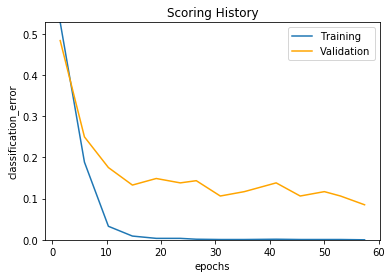

In [0]:
m2_200x200.plot()

As seen from the above graph that training error almost becomes 0 after 25 epchs, also the validation error is decreasing with the number of epochs. 

In [0]:
m2_200x200.model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.12304746560037731
RMSE: 0.35078122184686183
LogLoss: 0.7295908482036954
Mean Per-Class Error: 0.16371086105675145
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,1 / 2
0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 4
0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 4
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1 / 2
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,69.0,0.0,0.0,0.0,0.0547945,4 / 73
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.8636364
2,0.9204546
3,0.9318182
4,0.9488636
5,0.9602272
6,0.9602272
7,0.9602272
8,0.9602272
9,0.9659091
10,0.9659091


As we can see from the above data, the error rate has reduced from 26% to 13.6% for the test data. Also, MSE and RMSE has improved from our previous model as we have given more number of hidden layers for the model to train on.  

In [0]:
m2_200x200.scoring_history()

### Saving the models

In [0]:
m1 = h2o.save_model(model = m1_DLC, path ="C:\\Users\\bkhandhadia2\\Downloads\\H2O_models" )

In [0]:
m2 = h2o.save_model(model = m2_200x200, path ="C:\\Users\\bkhandhadia2\\Downloads\\H2O_models")

In [0]:
h2o.shutdown(prompt = False)

[WARNING] in <ipython-input-37-b3a1aba4ba88> line 1:
    >>> h2o.shutdown(prompt = False)
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_a223 closed.
